In [1]:
import pickle
import xml2py
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
with open("datos_output.pkl", "rb") as f:
    data = pickle.load(f)


In [3]:
cost_shareWeight_emisions = []
non_cost_shareWeight_emisions = {}
for var in data['USA'].keys():
    coincidencias = sum(1 for elem in ['cost', 'share-weight', 'emissions'] if elem in list(data['USA'][var].keys()))
    if any(item in ['cost', 'share-weight', 'emissions'] for item in list(data['USA'][var].keys())):
        cost_shareWeight_emisions.append(var)
    else:
        non_cost_shareWeight_emisions.update({var : list(data['USA'][var].keys())})

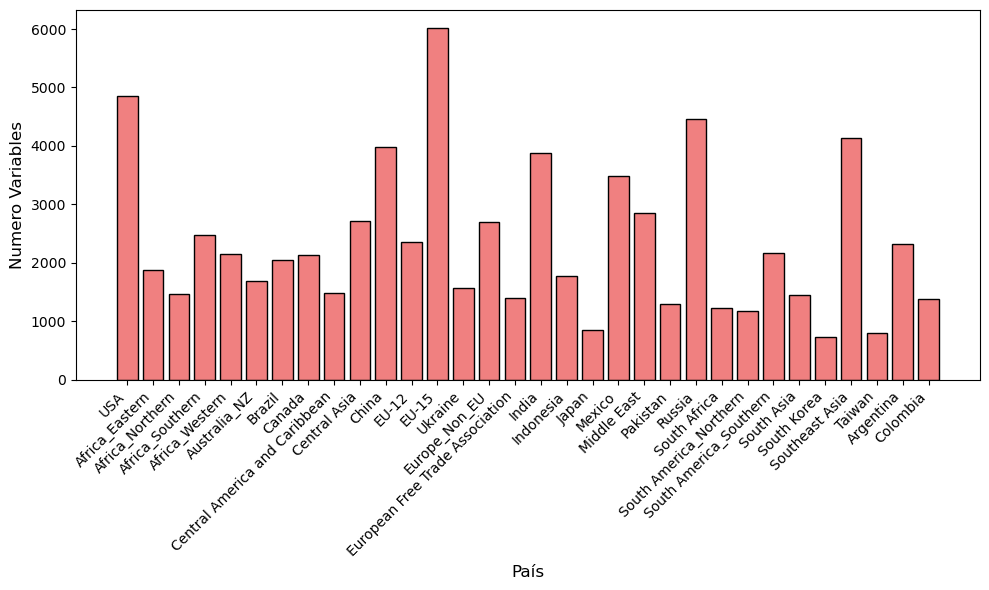

In [6]:
N_vars_per_pais = {}
for pais in data.keys():
    N_vars_per_pais.update({pais : len(data[pais].keys())})
etiquetas = list(N_vars_per_pais.keys())
valores = list(N_vars_per_pais.values())
x = range(len(etiquetas))
plt.figure(figsize=(10, 6))
plt.bar(x, valores, color='lightcoral', edgecolor='black')
plt.xticks(ticks=x, labels=etiquetas, rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("País", fontsize=12)
plt.ylabel("Numero Variables", fontsize=12)
plt.tight_layout()
plt.show()

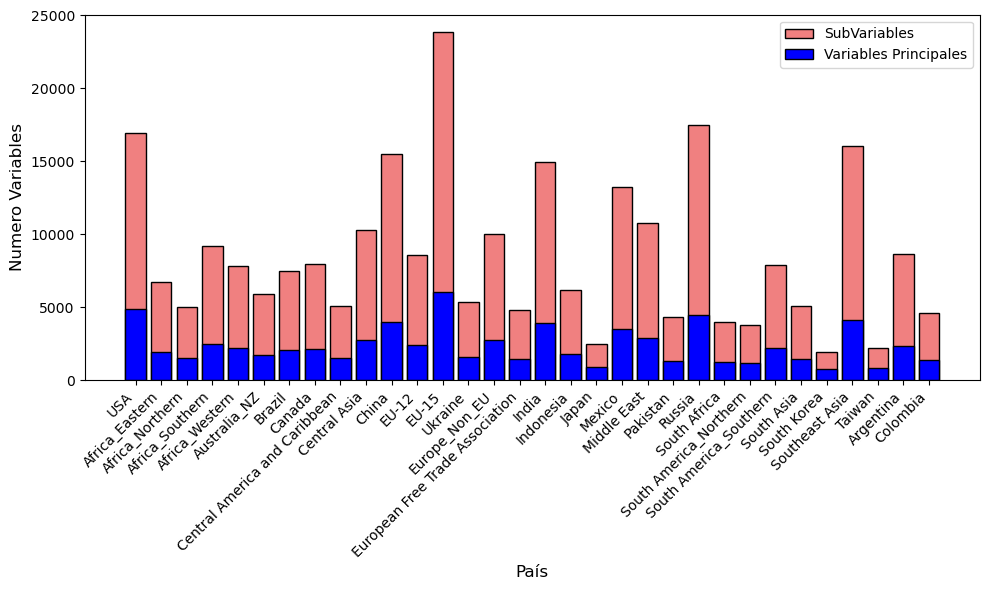

In [7]:

vars_per_pais = {}
for pais in data.keys():
    lista_varsPais = list(data[pais].keys())
    var_per_var = {}
    for varPais in lista_varsPais:
        var_per_var.update({varPais : list(data[pais][varPais].keys())})
    vars_per_pais.update({pais : var_per_var})
N_subvars_pais = {}
for pais in vars_per_pais.keys():
    plana = [x for sublista in vars_per_pais[pais].values() for x in sublista]
    N_subvars_pais.update({pais : len(plana)})

etiquetas = list(N_subvars_pais.keys())
Nvariables = list(N_subvars_pais.values())
etiquetas2 = list(N_vars_per_pais.keys())
NSubVariables = list(N_vars_per_pais.values())
x = range(len(etiquetas))
plt.figure(figsize=(10, 6))
plt.bar(x, Nvariables, color='lightcoral', edgecolor='black', label = 'SubVariables')
plt.bar(x, NSubVariables, color='blue', edgecolor='black', label = 'Variables Principales')
plt.xticks(ticks=x, labels=etiquetas, rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("País", fontsize=12)
plt.ylabel("Numero Variables", fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()

In [4]:
df = xml2py._1_flatten_region_timeseries(data)

df['var_param'] = df['variable'] + '_' + df['parameter']
df_pivot = df.pivot_table(
    index=['region', 'year'], 
    columns='var_param', 
    values='value'
).reset_index()
df_pivot = df_pivot.rename(columns={'region': 'Country'})
df_pivot.columns.name = None
df_pivot.columns = [str(c) for c in df_pivot.columns]

PCA

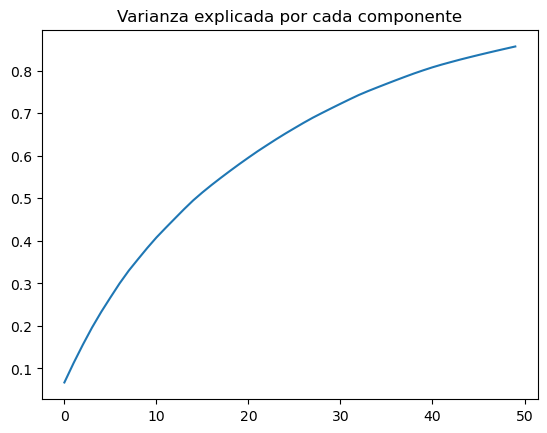

In [18]:
df_numeric = df_pivot.drop(['Country', 'year'], axis = 1).fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)
n_components = 50
pca = PCA(n_components=n_components) 
X_pca = pca.fit_transform(X_scaled)

columnas = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca, columns=columnas)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Varianza explicada por cada componente')
plt.show()

Clustering de variables

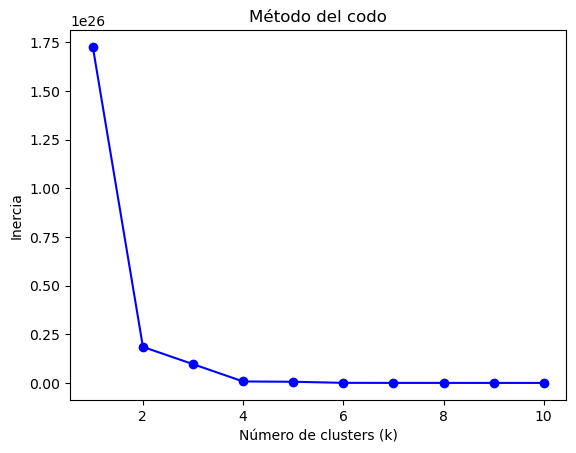

In [30]:
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numeric.T)
    inertias.append(kmeans.inertia_)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()